# setup and reading data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'

In [2]:
def read_file(name):
    file = open(f"./files/{name}.csv")

    alphas = []
    num_points = -1

    # struct to hold each point
    temp_dict = {
        "alpha": -1,
        "CL": -1,
        "CD": -1,
        "L/D": -1,
    }

    for line in file:
        values = line.strip().split(",")

        # if it has reached a new angle of attack, write the relevant stuff to a file
        if values[0] == "Alpha":
            if num_points != -1:
                alphas.append(temp_dict.copy())
            temp_dict["alpha"] = float(values[1])
            num_points += 1

        if values[0] == "CL":
            CLs = [float(n) for n in values[1: -1]]
            temp_dict["CL"] = sum(CLs)/(len(values) - 1)

        if values[0] == "CDi":
            CDs = [float(n) for n in values[1: -1]]
            temp_dict["CD"] = sum(CDs)/(len(values) - 1)
        
        if values[0] == "L/D":
            LDs = [float(n) for n in values[1: -1]]
            temp_dict["L/D"] = sum(LDs)/(len(values) - 1)
    
    return alphas


In [3]:
alphas_17 = read_file("run1")
alphas_53 = read_file("run2") # checking for convergence
alphas_25 = read_file("run3")
alphas_29 = read_file("run5")
pm = read_file("run6")

# plots

In [4]:
np.mean(np.gradient([a["CL"] for a in alphas_29]))

0.07014203690879167

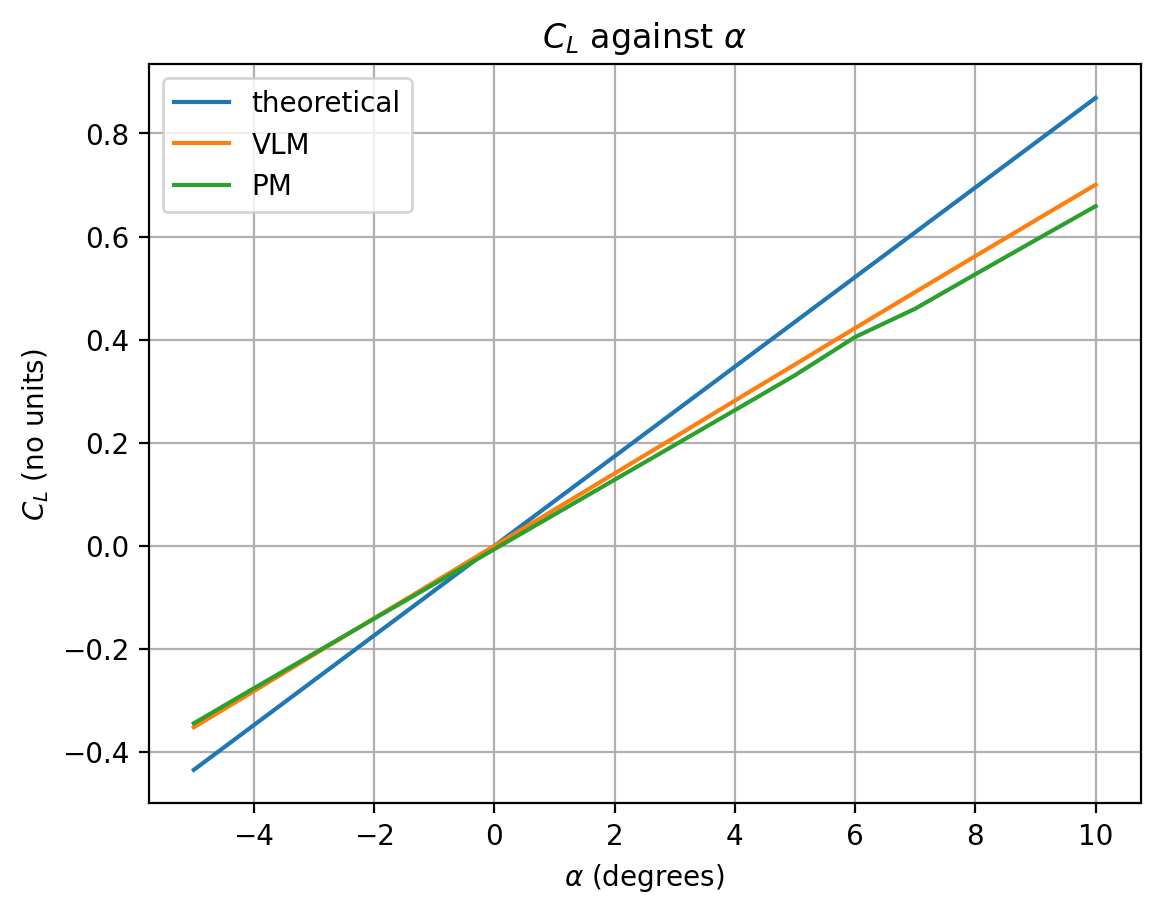

In [5]:
ideal_slope = [4.98 * alpha for alpha in np.linspace(np.radians(-5), np.radians(10))]
plt.plot(np.linspace(-5, 10), ideal_slope, label = "theoretical")
plt.plot([a["alpha"] for a in alphas_29], [a["CL"] for a in alphas_29], label = "VLM")
plt.plot([a["alpha"] for a in pm], [a["CL"] for a in pm], label = "PM")

plt.title(r"$C_L$ against $\alpha$")
plt.ylabel(r"$C_L$ (no units)")
plt.xlabel(r"$\alpha$ (degrees)")
plt.grid()
plt.legend()

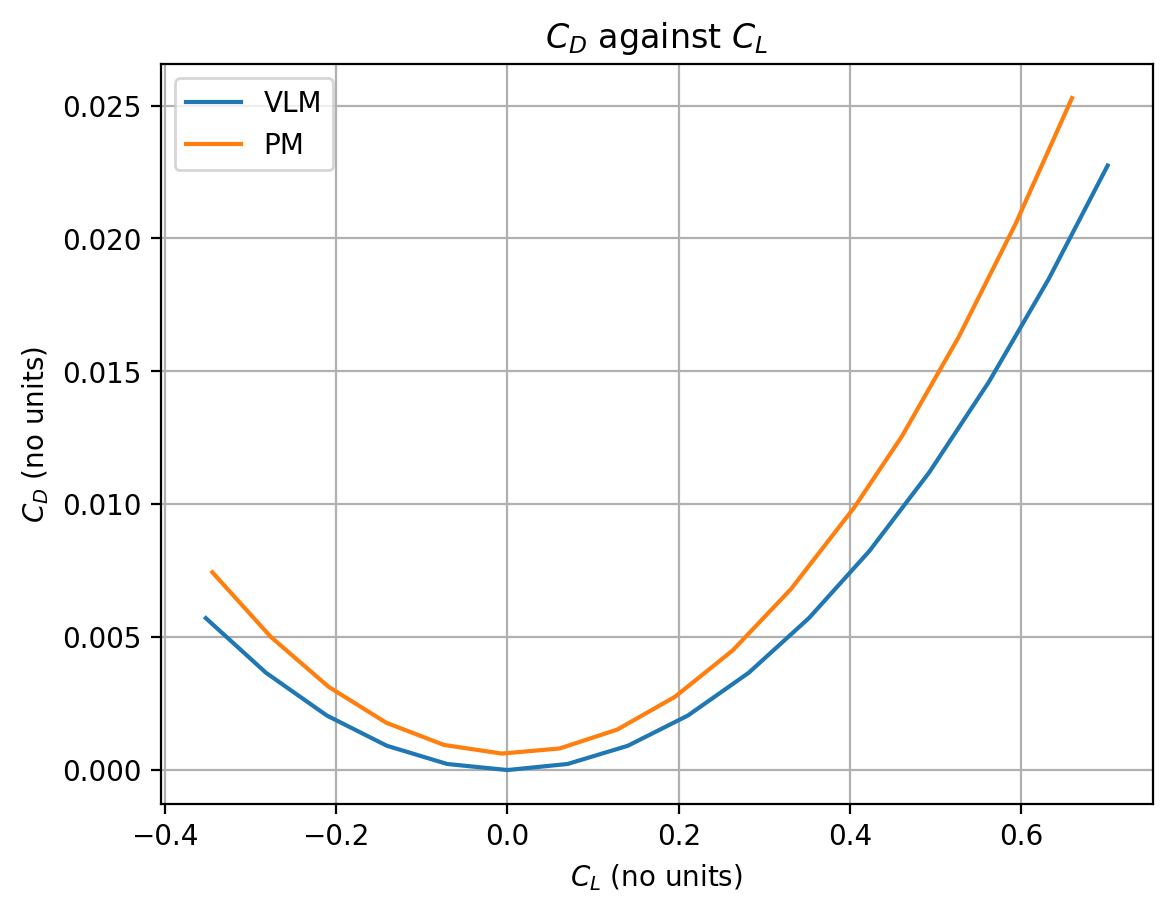

In [6]:
plt.plot([a["CL"] for a in alphas_29], [a["CD"] for a in alphas_29], label = "VLM")
plt.plot([a["CL"] for a in pm], [a["CD"] for a in pm], label = "PM")
plt.title(r"$C_D$ against $C_L$")
plt.ylabel(r"$C_D$ (no units)")
plt.xlabel(r"$C_L$ (no units)")
plt.grid()
plt.legend()

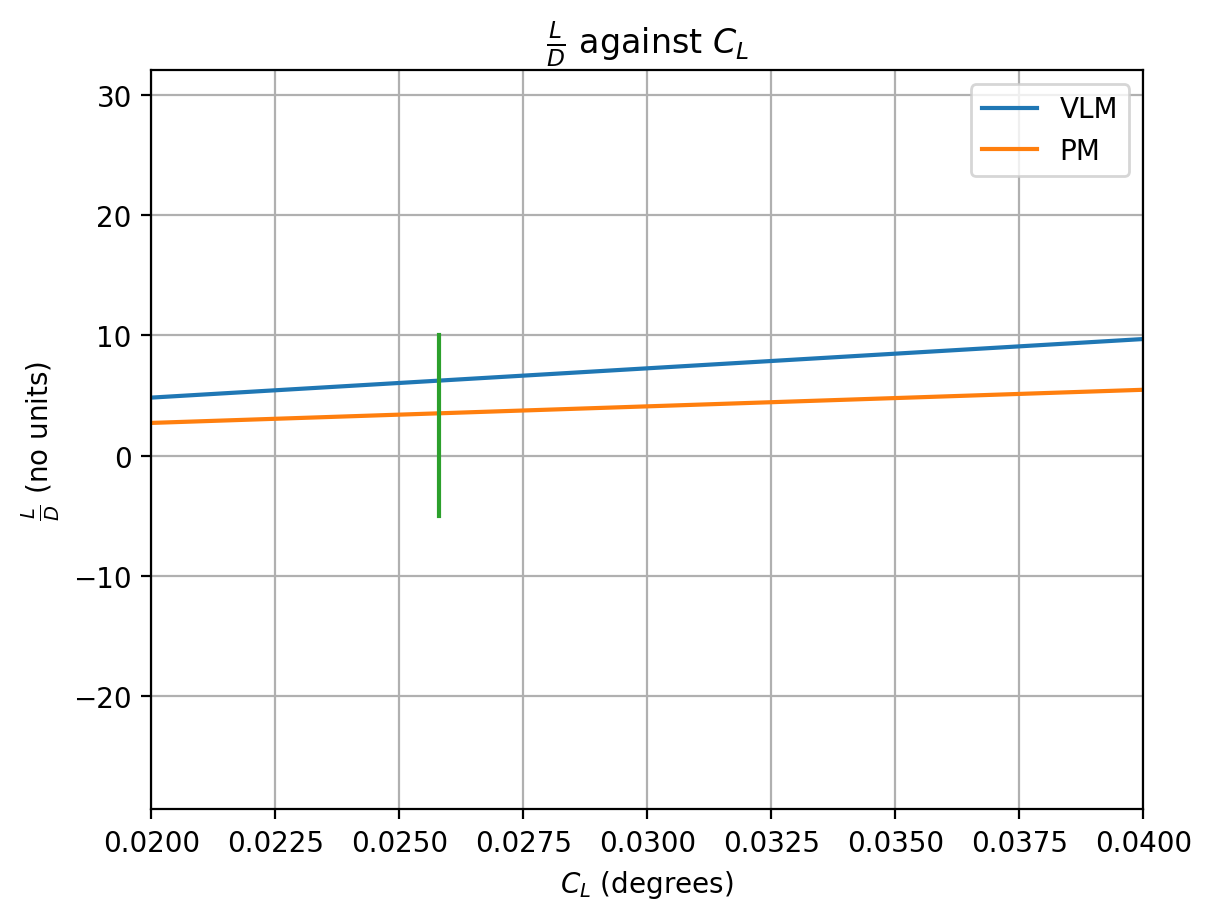

In [7]:
plt.plot([a["CL"] for a in alphas_25], [a["L/D"] for a in alphas_25], label = "VLM")
plt.plot([a["CL"] for a in pm], [a["L/D"] for a in pm], label = "PM")
plt.title(r"$\frac{L}{D}$ against $C_L$")
plt.ylabel(r"$\frac{L}{D}$ (no units)")
plt.xlabel(r"$C_L$ (degrees)")
plt.plot( [0.0258, 0.0258],[-5, 10])
plt.xlim(0.02, 0.04)
plt.grid()
plt.legend()

In [8]:
w_20 = read_file("no_clustering_w_20_m_0.8")
w_30 = read_file("no_clustering_w_30_m_0.8")
w_40 = read_file("no_clustering_w_40_m_0.8")
w_65 = read_file("no_clustering_w_65_m_0.8_newvsp")

In [9]:
cla_20 = np.mean(np.gradient([a["CL"] for a in w_20]))
cla_30 = np.mean(np.gradient([a["CL"] for a in w_30]))
cla_40 = np.mean(np.gradient([a["CL"] for a in w_40]))
cla_65 = np.mean(np.gradient([a["CL"] for a in w_65]))

print(f"with 20 spanwise panels: {np.degrees(cla_20)}")
print(f"with 30 spanwise panels: {np.degrees(cla_30)}")
print(f"with 40 spanwise panels: {np.degrees(cla_40)}")
print(f"with 65 spanwise panels: {np.degrees(cla_65)}")

with 20 spanwise panels: 4.640635499661479
with 30 spanwise panels: 4.644009186908181
with 40 spanwise panels: 4.650518987979823
with 65 spanwise panels: 4.654043570038534


Text(0.5, 0, '$N_w$')

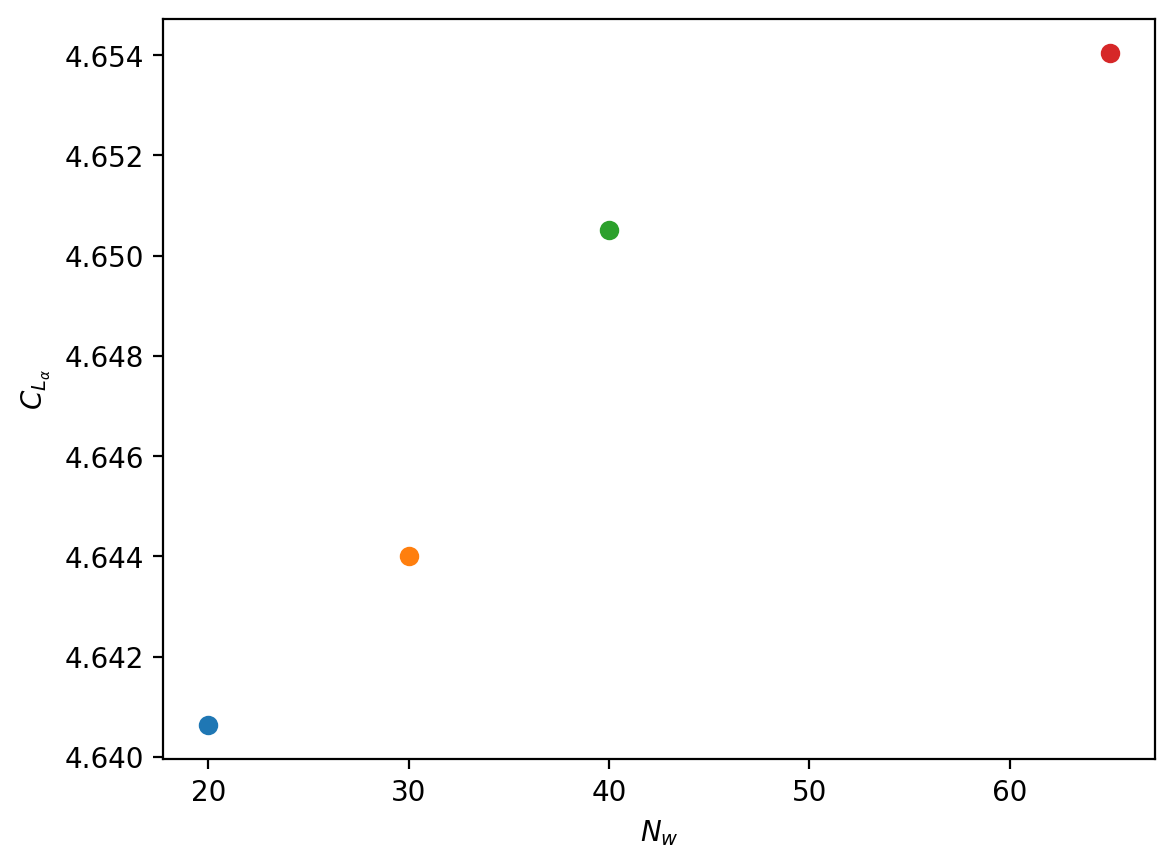

In [10]:
plt.scatter(20, np.degrees(cla_20))
plt.scatter(30, np.degrees(cla_30))
plt.scatter(40, np.degrees(cla_40))
plt.scatter(65, np.degrees(cla_65))
plt.ylabel(r"$C_{L_{\alpha}}$")
plt.xlabel(r"$N_w$")

In [11]:
np.degrees(cla_20)

4.640635499661479

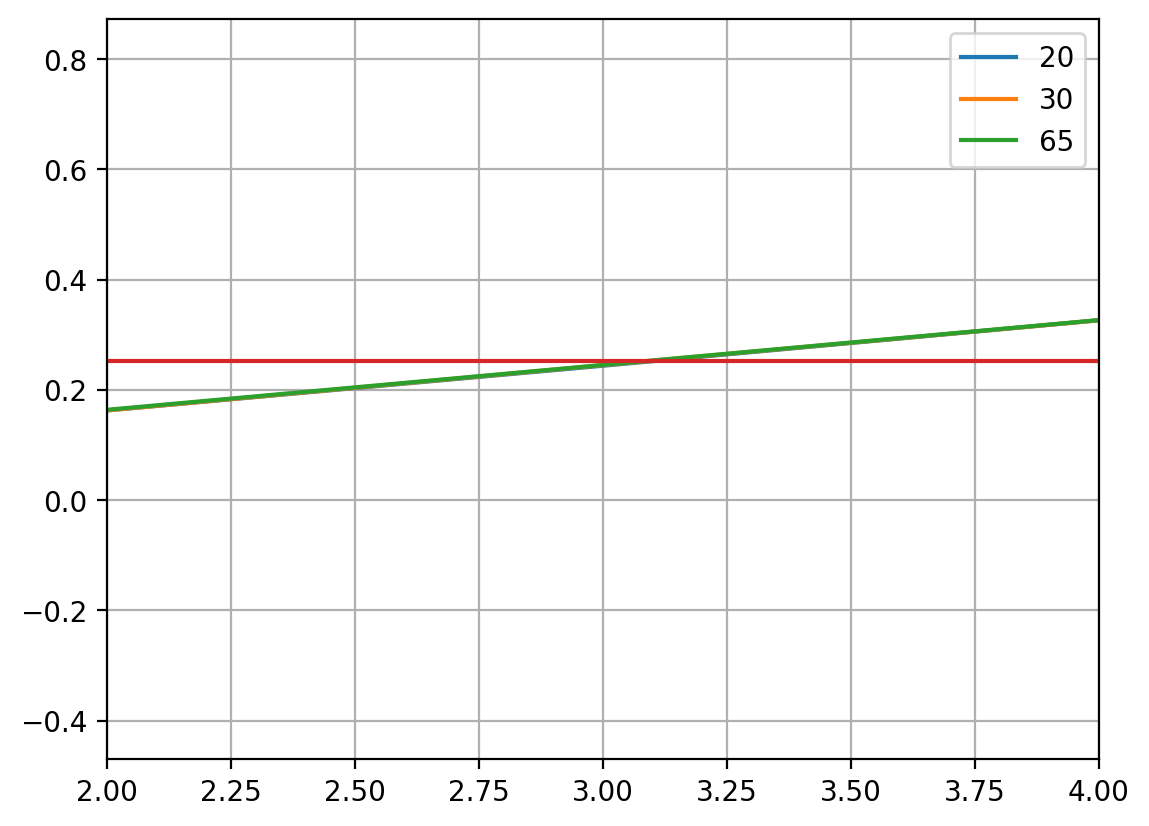

In [12]:
plt.plot([a["alpha"] for a in w_20], [a["CL"] for a in w_20], label = "20")
plt.plot([a["alpha"] for a in w_30], [a["CL"] for a in w_30], label = "30")
plt.plot([a["alpha"] for a in w_65], [a["CL"] for a in w_65], label = "65")
plt.plot([-5, 10], [0.253, 0.253])
plt.xlim(2, 4)
#plt.ylim(0, 0.1)
plt.legend()
plt.grid()

# some comments from here

In [13]:
# read CSVs from openVSP
filenames = ["no_clustering_w_65_m_0.8_newvsp", "le_0.9", "le_0.8", "le_0.7", "le_0.6", "le_0.5", "le_0.4"]
files = [read_file(f) for f in filenames]

In [14]:
# find lift curve slope
clas = [np.degrees(np.mean(np.gradient([a["CL"] for a in file]))) for file in files]

In [15]:
[print(f"{cla}") for cla in clas]

4.654043570038534
4.65588816091842
4.647604695553086
4.647014143335603
4.64596716617583
4.646097564830762
4.645318578680831


[None, None, None, None, None, None, None]

Text(0, 0.5, '$C_{L_\\alpha}$')

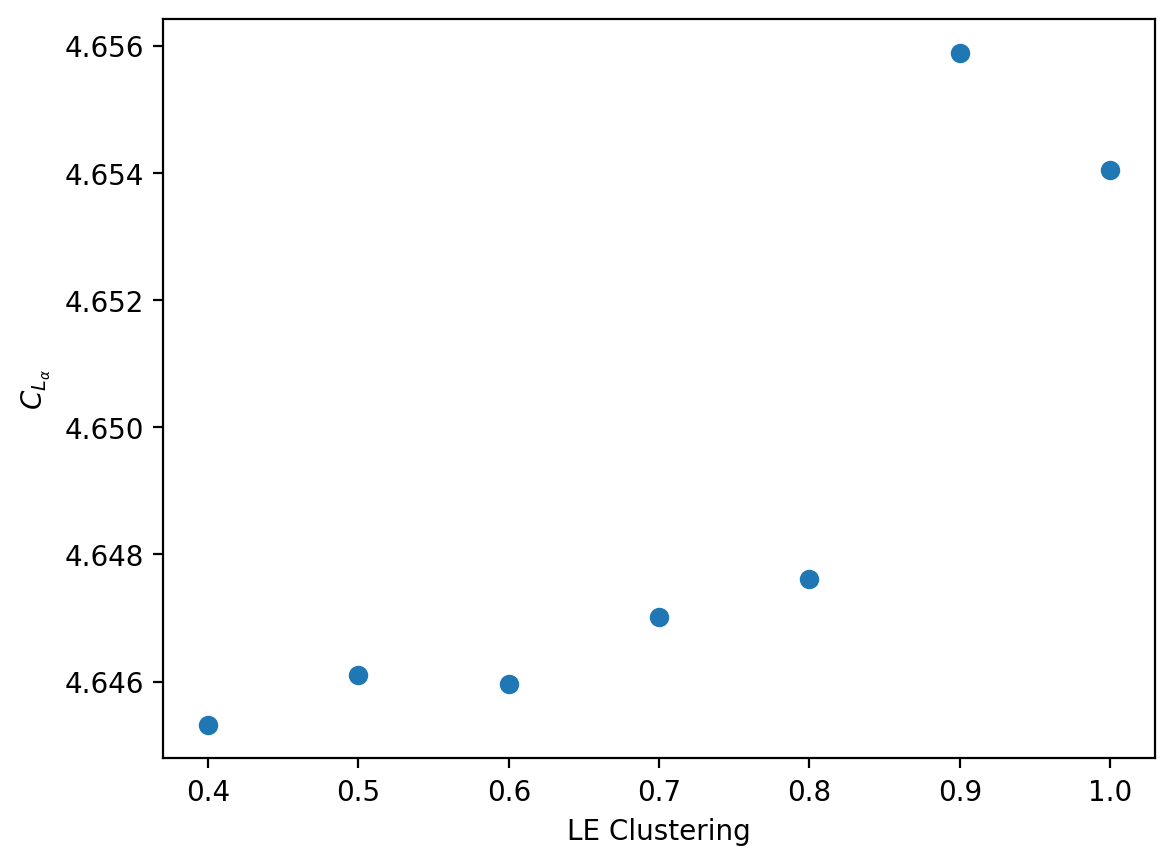

In [16]:
# plot the lift curve slope against the input to openvsp
plt.scatter([1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4], clas)
plt.xlabel("LE Clustering")
plt.ylabel(r"$C_{L_\alpha}$")

In [17]:
filenames = ["le_0.6", "te_0.9", "te_0.8", "te_0.7", "te_0.6", "te_0.5", "te_0.4"]
files = [read_file(f) for f in filenames]

In [18]:
clas = [np.degrees(np.mean(np.gradient([a["CL"] for a in file]))) for file in files]
[print(f"{cla}") for cla in clas]

4.64596716617583
4.645826018106077
4.645733428002482
4.644907383979784
4.645230959660766
4.654167400053203
4.6535593821899335


[None, None, None, None, None, None, None]

In [19]:
# using this for my design point
files[4][8]

{'alpha': 3.0,
 'CL': 0.2449088047914,
 'CD': 0.003192401598,
 'L/D': 24.4058814673962}

Text(0, 0.5, '$C_{L_\\alpha}$')

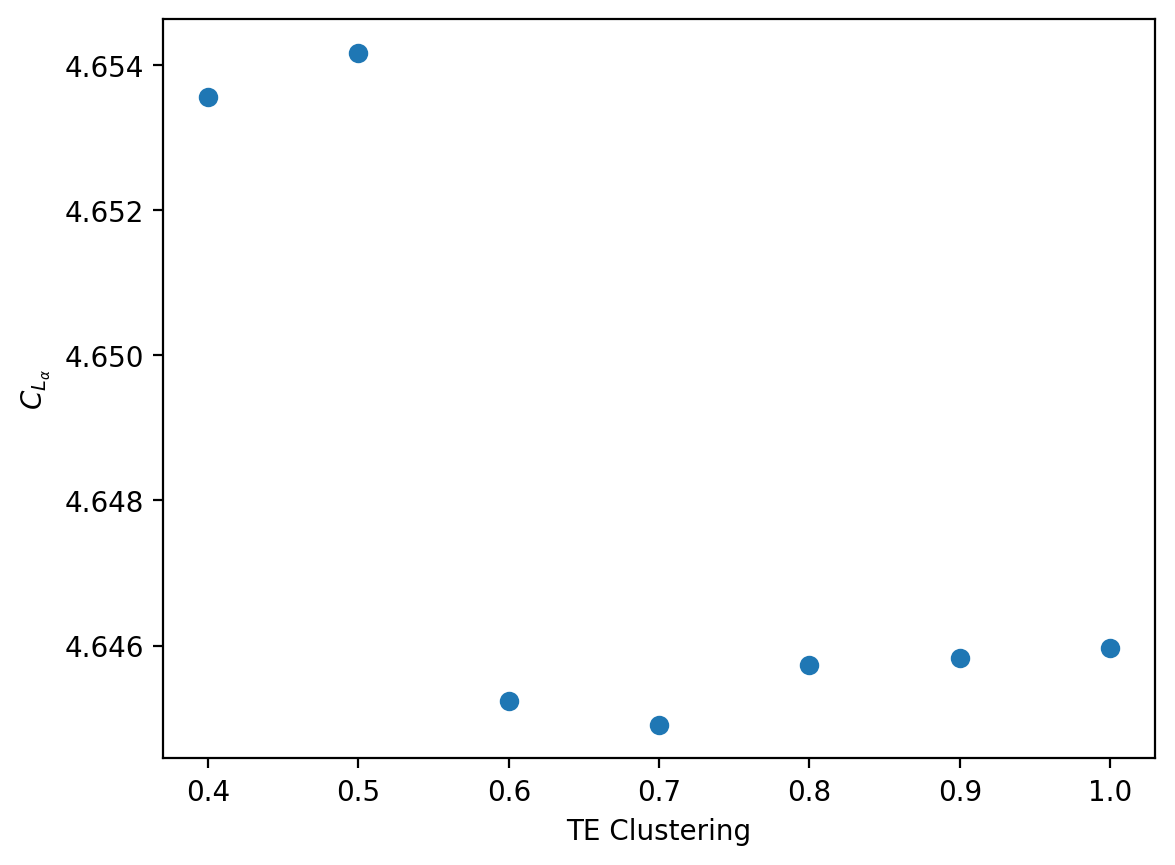

In [20]:
plt.scatter([1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4], clas)
plt.xlabel("TE Clustering")
plt.ylabel(r"$C_{L_\alpha}$")

In [21]:
filenames = ["pm_21", "pm_33", "pm_41", "pm_53", "pm_61", "pm_73", "pm_81", "pm_93", "pm_101", "pm_113"]
files = [read_file(f) for f in filenames]
clas = [np.degrees(np.mean(np.gradient([a["CL"] for a in file]))) for file in files]
[print(f"{cla}") for cla in clas]

5.361536114420004
5.280947666594956
5.204421897004559
5.143335378275685
5.097846913863867
5.044898831971494
5.029484519087617
4.937079616710622
4.924929974659476
4.907725649552872


[None, None, None, None, None, None, None, None, None, None]

Text(0, 0.5, '$C_{L_\\alpha}$')

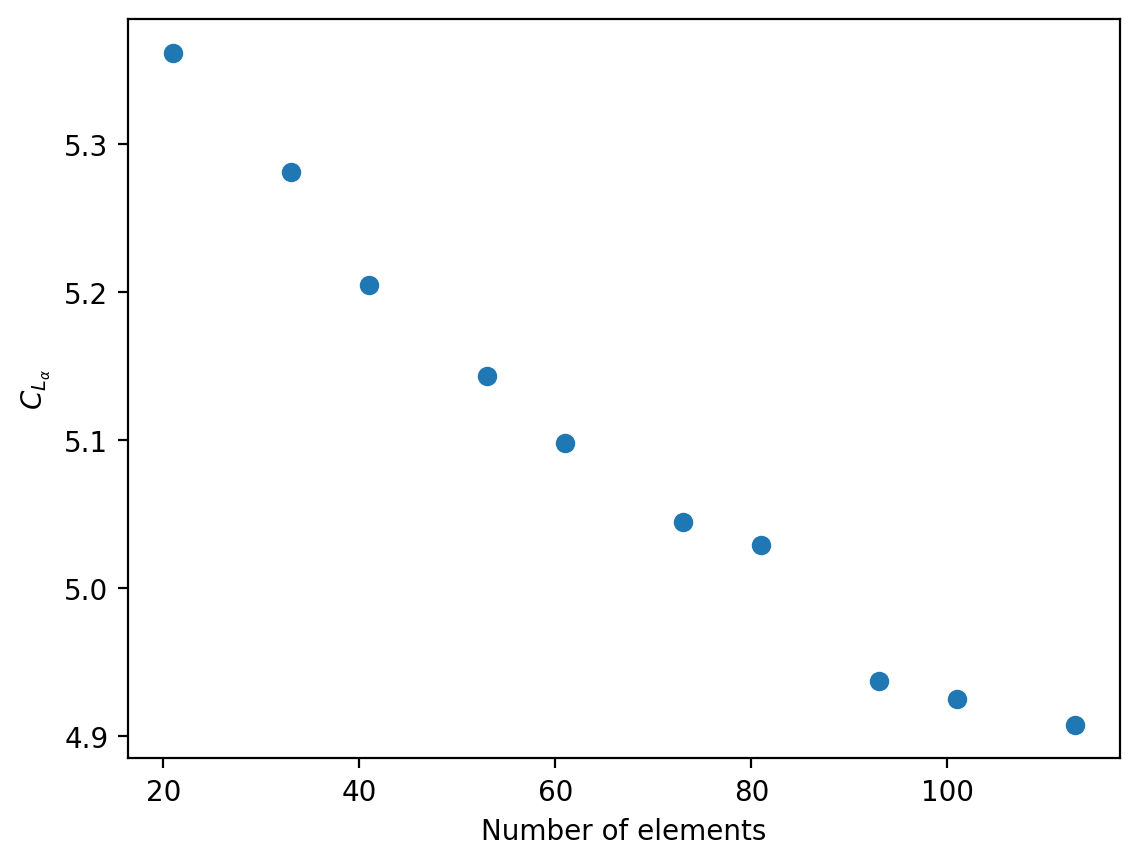

In [22]:
plt.scatter([21, 33, 41, 53, 61, 73, 81, 93, 101, 113], clas)
plt.xlabel("Number of elements")
plt.ylabel(r"$C_{L_\alpha}$")

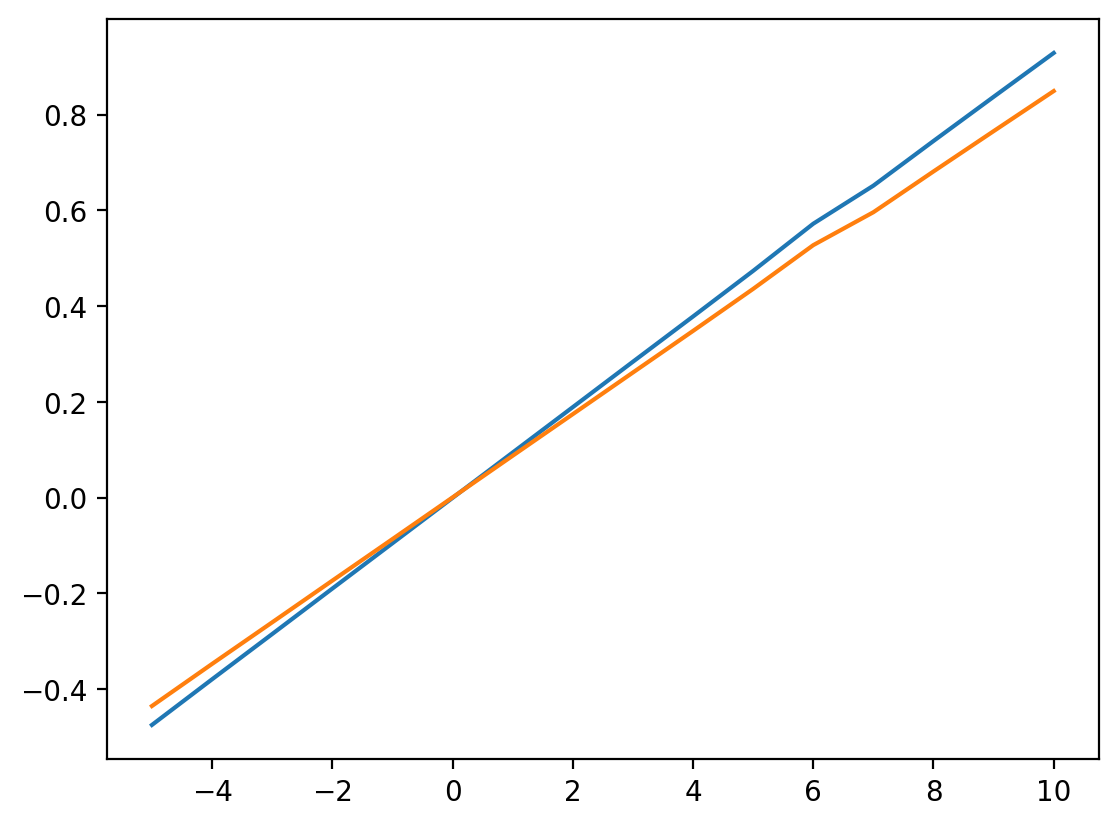

In [23]:
plt.plot([a["alpha"] for a in files[0]], [a["CL"] for a in files[0]])
plt.plot([a["alpha"] for a in files[-1]], [a["CL"] for a in files[-1]])

In [24]:
filenames = ["pm_93", "pm_le_0.8", "pm_le_0.6", "pm_le_0.4"]
files = [read_file(f) for f in filenames]
clas = [np.degrees(np.mean(np.gradient([a["CL"] for a in file]))) for file in files]
[print(f"{cla}") for cla in clas]

4.937079616710622
4.92980978733824
4.9321352722809735
4.924710876443013


[None, None, None, None]

Text(0, 0.5, '$C_{L_\\alpha}$')

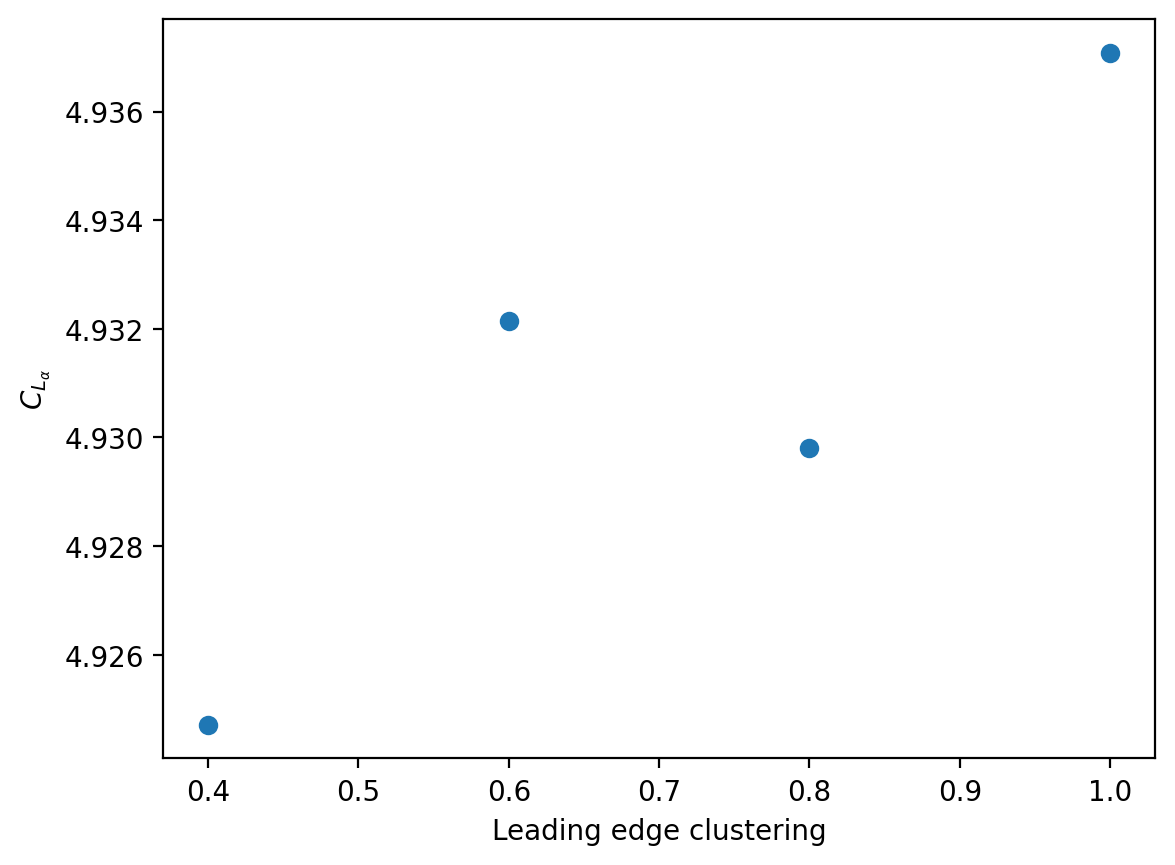

In [25]:
plt.scatter([1, 0.8, 0.6, 0.4], clas)
plt.xlabel("Leading edge clustering")
plt.ylabel(r"$C_{L_\alpha}$")

In [26]:
filenames = ["pm_le_0.8", "pm_te_0.8", "pm_te_0.6", "pm_te_0.4",  "pm_te_0.3", "pm_te_0.2"]
files = [read_file(f) for f in filenames]
clas = [np.degrees(np.mean(np.gradient([a["CL"] for a in file]))) for file in files]
[print(f"{cla}") for cla in clas]

4.92980978733824
4.904104586784399
4.880454711921054
4.8410015862074145
4.821187530202016
0.8388337175936297


[None, None, None, None, None, None]

In [27]:
files[4][8]

{'alpha': 3.0,
 'CL': 0.2565616128764,
 'CD': 0.012954810228,
 'L/D': 11.3037766131096}

Text(0, 0.5, '$C_{L_\\alpha}$')

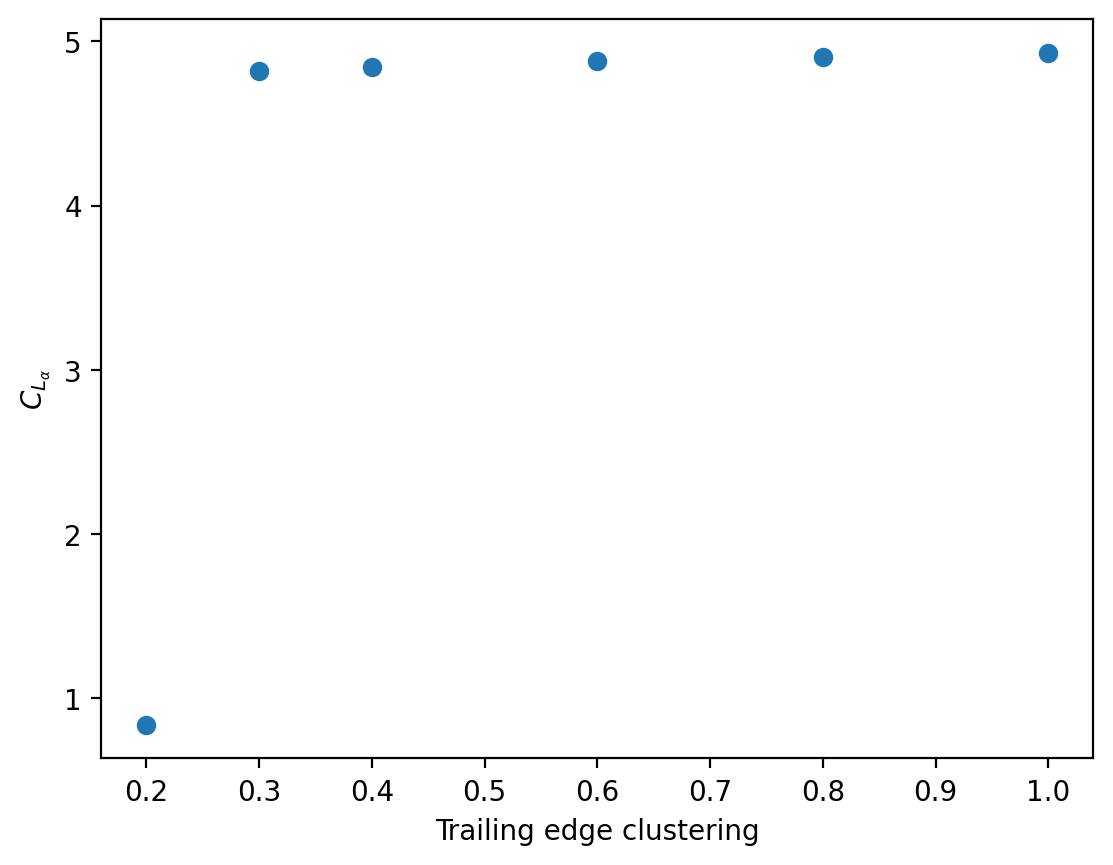

In [28]:
plt.scatter([1, 0.8, 0.6, 0.4, 0.3, 0.2], clas[:])
plt.xlabel("Trailing edge clustering")
plt.ylabel(r"$C_{L_\alpha}$")

In [29]:
def read_ansys(path):
    readings = []
    with open(path, 'r') as file:
        for line in file:
            try:
                things = line.strip().split(" ")
                readings.append(float(things[1]))
            except:
                pass
    return readings

def normalise(y):
    x = np.linspace(0, 100, num=len(y))
    return x

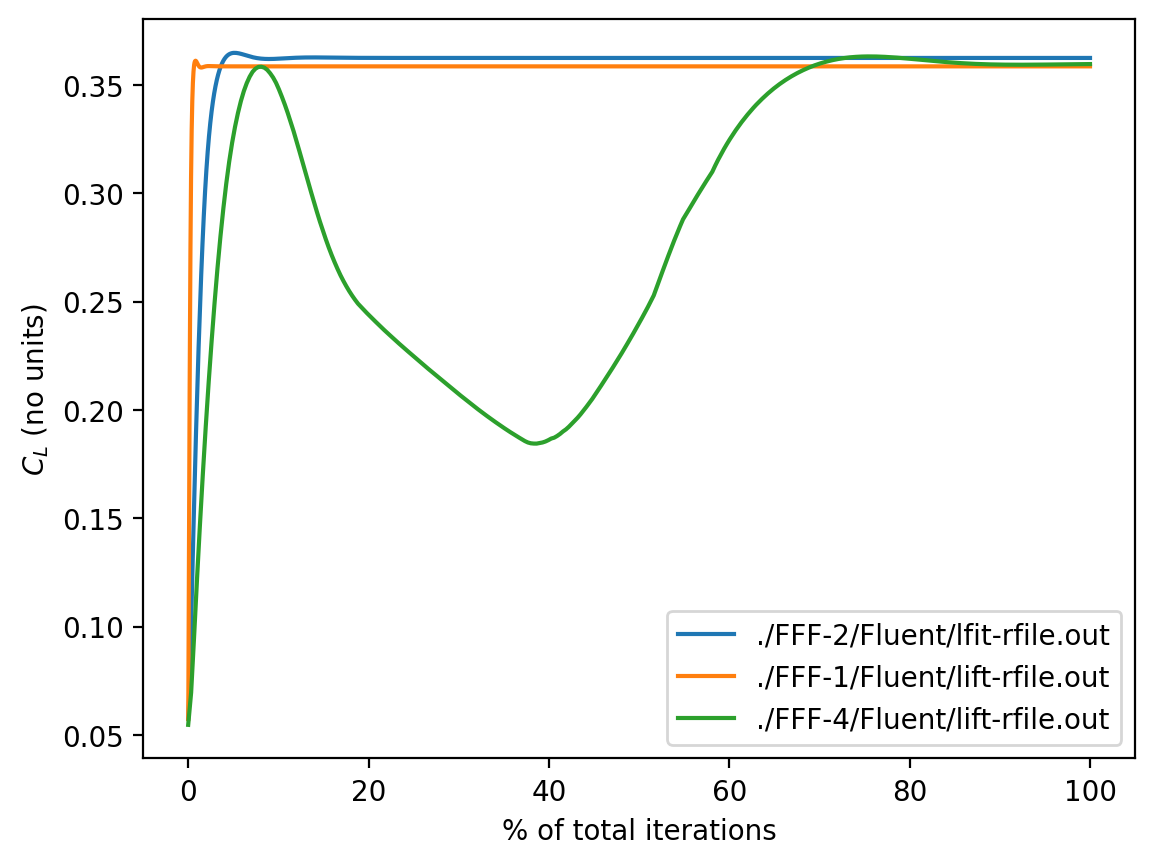

In [66]:
# plotting convergence from ansys fluent, doing CL against what percentage of steps
paths = ["./FFF-2/Fluent/lfit-rfile.out", "./FFF-1/Fluent/lift-rfile.out", "./FFF-4/Fluent/lift-rfile.out"]
datas = [read_ansys(p) for p in paths]
[plt.plot(normalise(datas[i]), datas[i], label=paths[i]) for i in range(len(paths))]
plt.xlabel("% of total iterations")
plt.ylabel(r"$C_L$ (no units)")
plt.legend()

In [31]:
# read in the "converged" bits
vlm_final = read_file("te_0.6")
pm_final = read_file("pm_te_0.3")

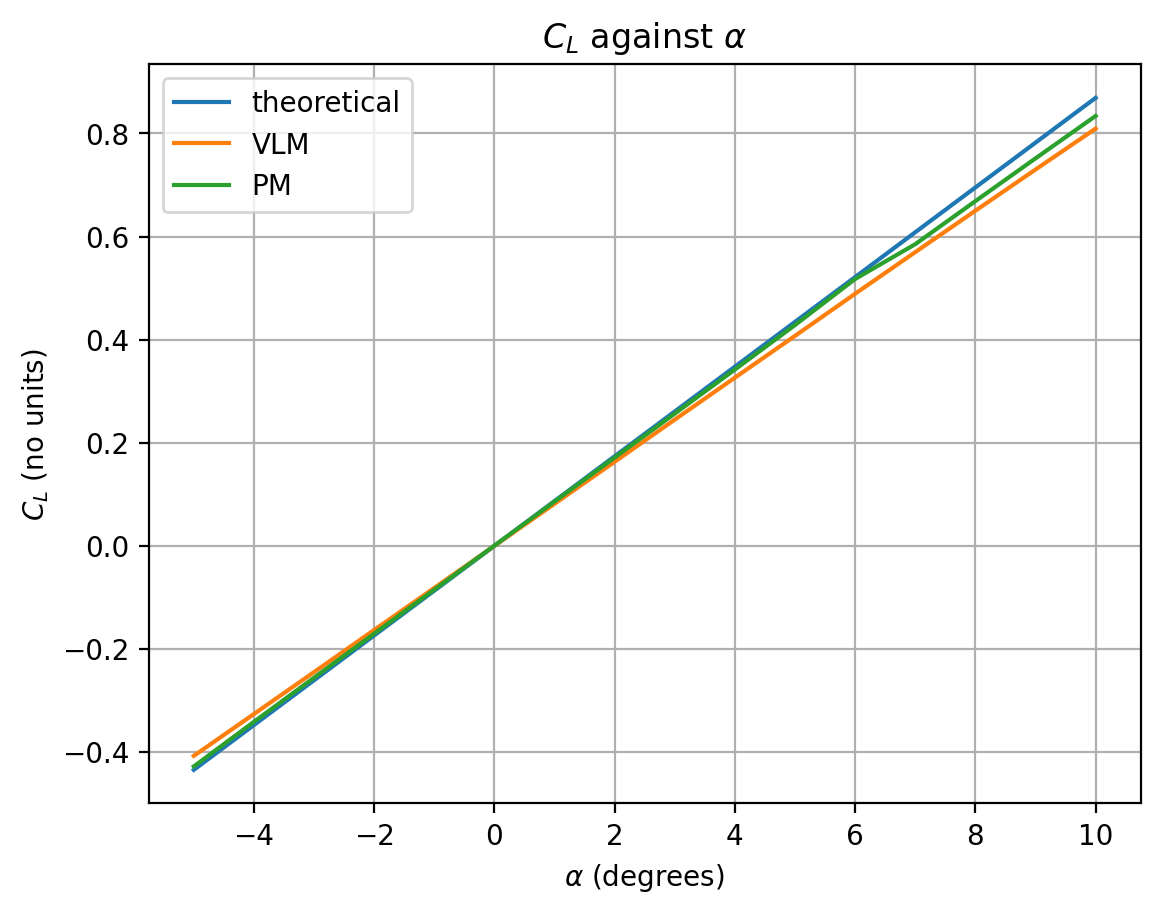

In [32]:
# ideal slope calculated from equation from aerodynamics last year
ideal_slope = [4.98 * alpha for alpha in np.linspace(np.radians(-5), np.radians(10))]
plt.plot(np.linspace(-5, 10), ideal_slope, label = "theoretical")

# i have my stuff set up weirdly so ive got to do stuff weirdly for the plotting
plt.plot([a["alpha"] for a in vlm_final], [a["CL"] for a in vlm_final], label = "VLM")
plt.plot([a["alpha"] for a in pm_final], [a["CL"] for a in pm_final], label = "PM")

plt.title(r"$C_L$ against $\alpha$")
plt.ylabel(r"$C_L$ (no units)")
plt.xlabel(r"$\alpha$ (degrees)")
plt.grid()
plt.legend()

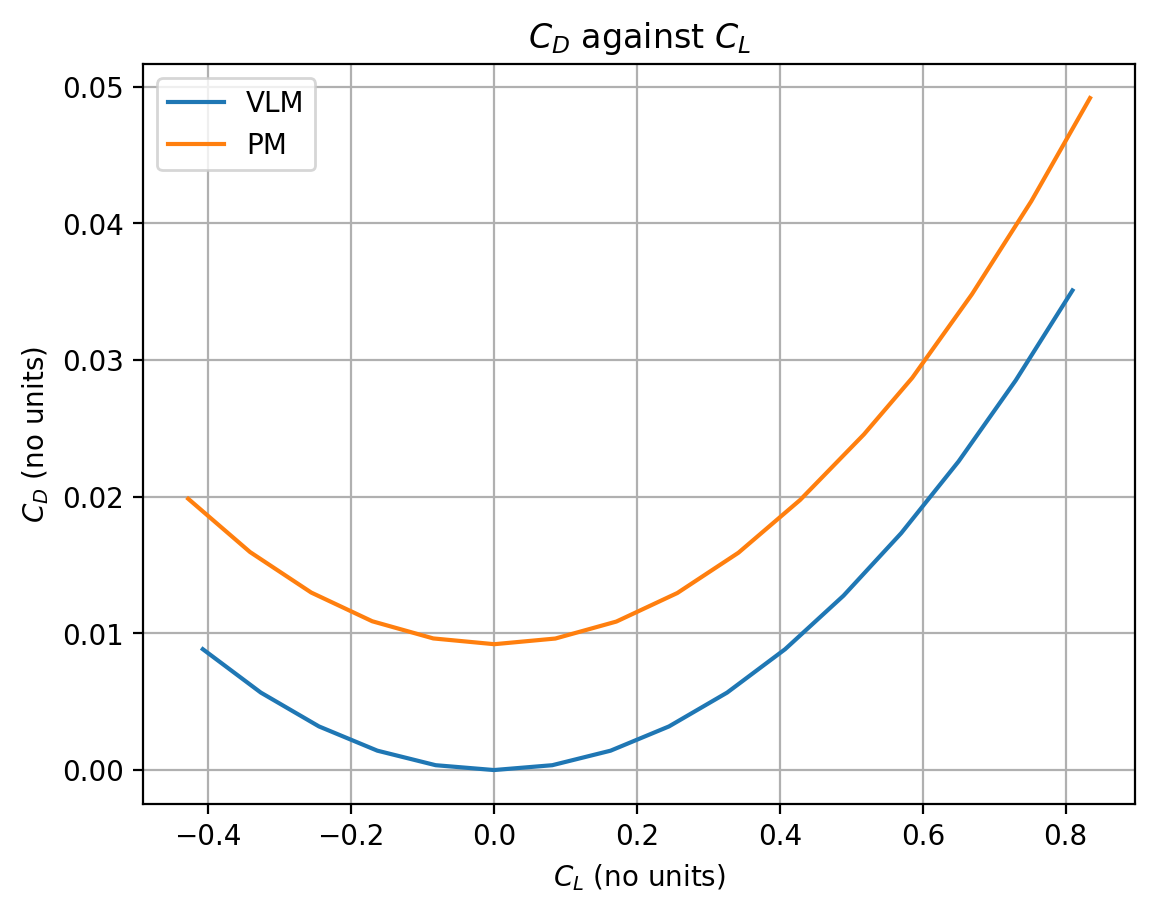

In [33]:
plt.plot([a["CL"] for a in vlm_final], [a["CD"] for a in vlm_final], label = "VLM")
plt.plot([a["CL"] for a in pm_final], [a["CD"] for a in pm_final], label = "PM")

plt.title(r"$C_D$ against $C_L$")
plt.ylabel(r"$C_D$ (no units)")
plt.xlabel(r"$C_L$ (no units)")
plt.grid()
plt.legend()

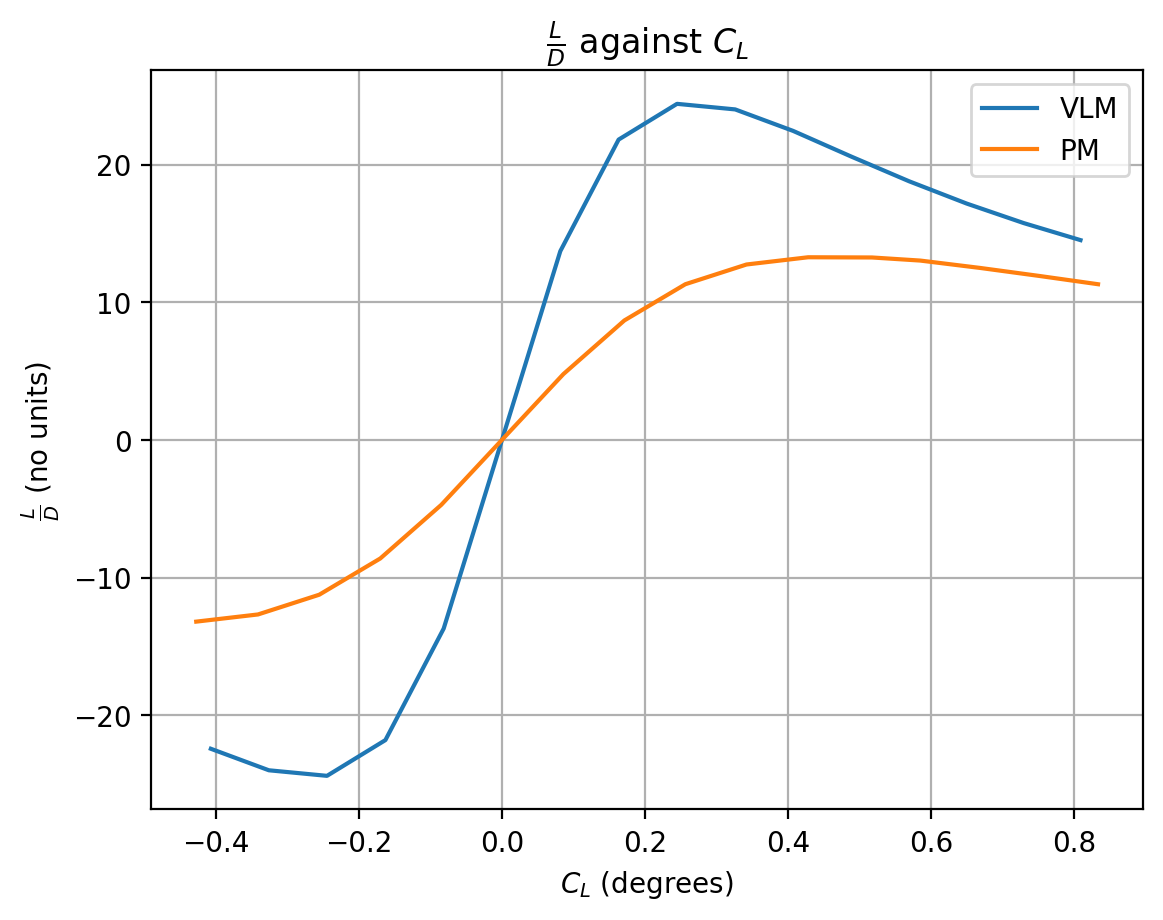

In [34]:
plt.plot([a["CL"] for a in vlm_final], [a["L/D"] for a in vlm_final], label = "VLM")
plt.plot([a["CL"] for a in pm_final], [a["L/D"] for a in pm_final], label = "PM")
plt.title(r"$\frac{L}{D}$ against $C_L$")
plt.ylabel(r"$\frac{L}{D}$ (no units)")
plt.xlabel(r"$C_L$ (degrees)")
plt.grid()
plt.legend()

In [123]:
# make sure to set everything right wrt fff-1
names = ["continuity", "x-velocity", "y-velocity", "z-velocity", "energy"]
things = []
output = []
last = 0
with open("./FFF-1/Fluent/SolutionMonitor") as file:
    for line in file:
        
        words = line.strip().split(" ")
        if words[0] == "128":
            things.append(output)
            output = []
        
        try:
            [output.append(0.5*np.log(float(words[1])/float(words[2]))) for i in range(int(words[0]) - last)]
            last = int(words[0])
        except:
            pass

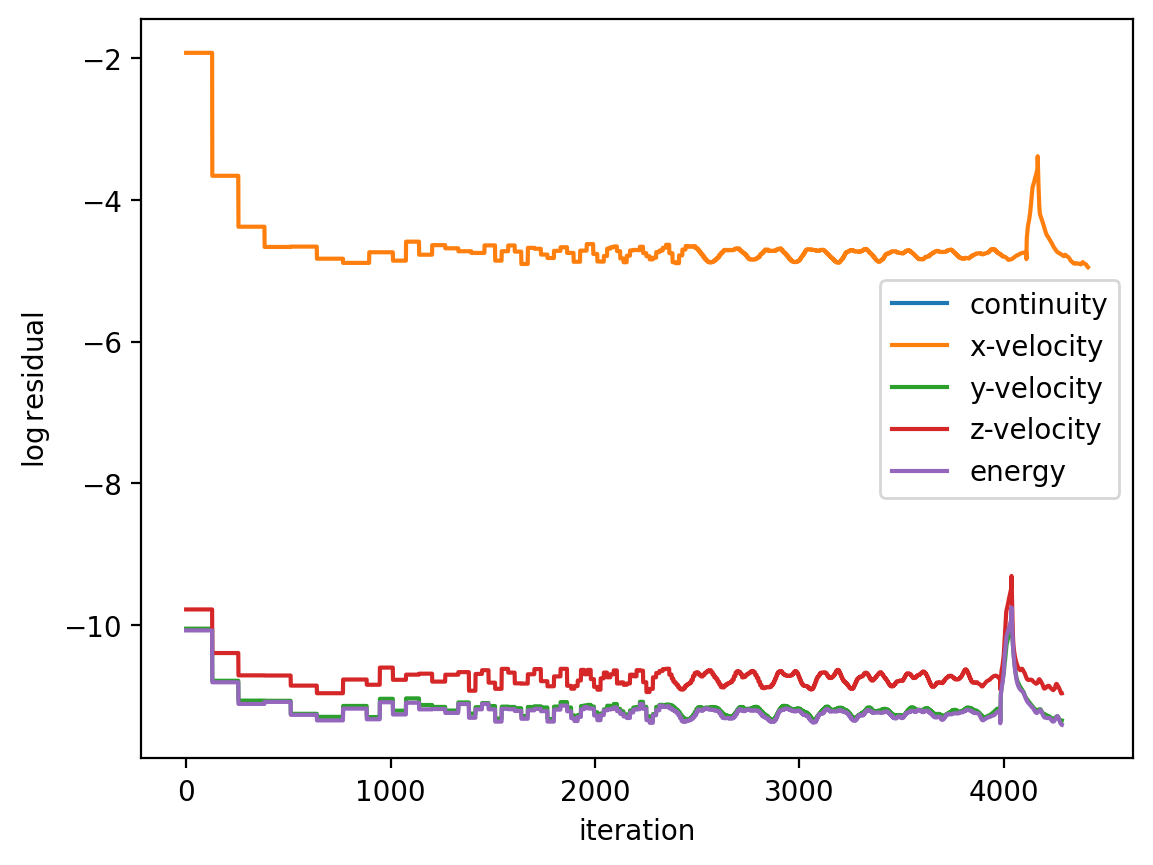

In [124]:
[plt.plot(things[i], label=names[i]) for i in range(len(things))]
plt.ylabel(r"$\log$residual")
plt.xlabel("iteration")
plt.legend()

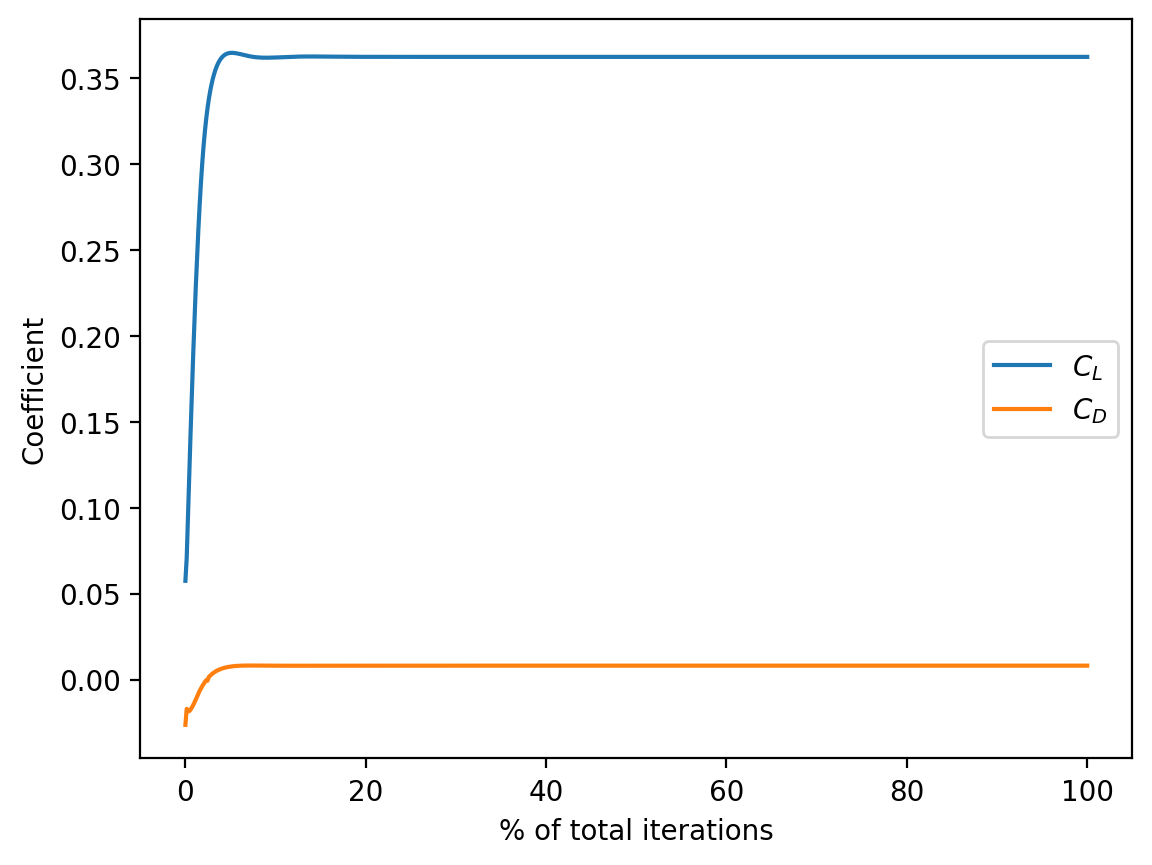

In [125]:
paths = ["./FFF-2/Fluent/lfit-rfile.out", "./FFF-2/Fluent/report-def-0-rfile.out"]
labels = [r"$C_L$", r"$C_D$"]
datas = [read_ansys(p) for p in paths]
[plt.plot(normalise(datas[i]), datas[i], label=labels[i]) for i in range(len(paths))]
plt.xlabel("% of total iterations")
plt.ylabel(r"Coefficient")
plt.legend()

In [156]:
paths = ["./FFF-2/Fluent/lfit-rfile.out", "./FFF-1/Fluent/lift-rfile.out", "./FFF-4/Fluent/lift-rfile.out"]
cls_ansys_all = [read_ansys(p) for p in paths]
cls_ansys = [data[-1] for data in cls_ansys_all]

paths = ["./FFF-2/Fluent/report-def-0-rfile.out", "./FFF-1/Fluent/drag-rfile.out", "./FFF-4/Fluent/drag-rfile.out"]
cds_ansys_all = [read_ansys(p) for p in paths]
cds_ansys = [data[-1] for data in cds_ansys_all]


elements = [520745, 893670, 1360191]

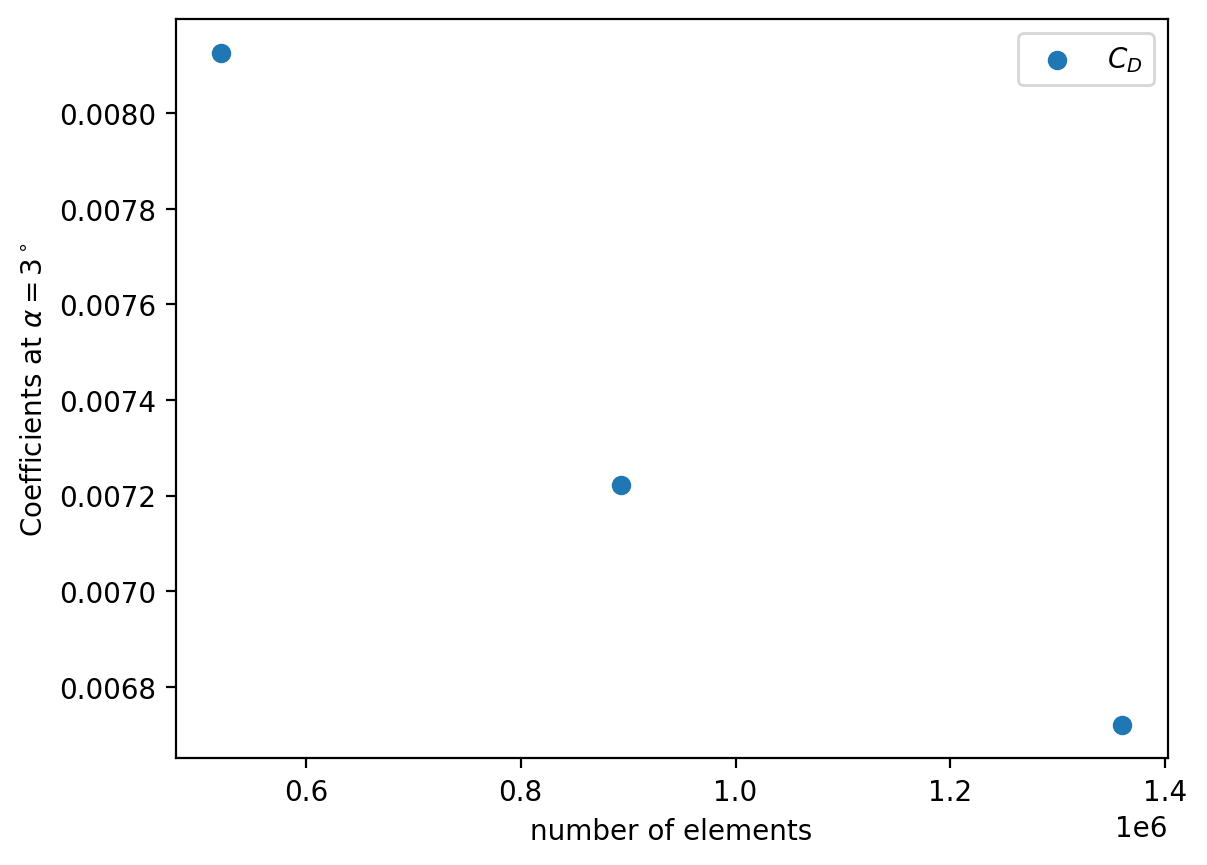

In [168]:
plt.scatter(elements, cds_ansys, label=r"$C_D$")
plt.ylabel(r"Coefficients at $\alpha = 3^\circ$")
plt.xlabel("number of elements")
plt.legend()

In [165]:
dp_vlm = vlm_final[8]
dp_pm = pm_final[8]

In [172]:
dp_vlm

{'alpha': 3.0,
 'CL': 0.2449088047914,
 'CD': 0.003192401598,
 'L/D': 24.4058814673962}

In [169]:
cds_ansys

[0.008126402554346388, 0.007222527686010268, 0.006720426805531795]

In [170]:
cls_ansys

[0.3624220873892359, 0.3585326848063874, 0.3595954887716394]